In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import pandas as pd
from datetime import datetime, timedelta, date

def kap_filtreli_arama_liste(endeks="BIST KATILIM 100",konu="Yeni İş İlişkisi",tarih_araligi="Son 1 ay"):
    # Tarayıcı sürücüsünü başlat
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--incognito")
    driver = webdriver.Chrome(options=chrome_options)
    driver.maximize_window()
    driver.delete_all_cookies()

    # Sayfayı aç
    driver.get("https://www.kap.org.tr/tr/bildirim-sorgu")

    # Sayfanın yüklenmesini bekle (10 saniye maksimum)
    wait = WebDriverWait(driver, 20)

    #endeks butonu
    konu_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[@id=\"email-form\"]/div[2]/div[5]/div[3]/div[2]/a")))
    konu_button.click()

    #Liste elemntini bul
    liste_element = wait.until(EC.visibility_of_element_located((By.ID, "mCSB_1_container")))

    #İstenilen endeksi bul
    istenilen_a_nesnesi = liste_element.find_element(By.XPATH, "//a[contains(text(), '" + endeks + "')]")

    #İstenilen endekse kada kaydır listeyi
    driver.execute_script("arguments[0].scrollIntoView(true);", istenilen_a_nesnesi)

    #endeks seçme
    konu_secme_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[contains(text(), '" + endeks + "')]")))
    konu_secme_button.click()

    #konu
    konu_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[@id=\"email-form\"]/div[4]/div[4]/isteven-multi-select/span/button")))
    konu_button.click()

    #konu seçme
    konu_secme_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), '" + konu + "')]")))
    konu_secme_button.click()

    #konuları kapatma
    konu_button.click()

    #zaman aralığı
    tarih_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[@id=\"email-form\"]/div[6]/div[1]/div[2]/a")))
    tarih_button.click()

    #zaman aralığı seçme
    zaman_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[contains(@class, 'filter-singledropselect') and contains(text(), '" + tarih_araligi + "')]")))
    zaman_button.click()

    #arama
    zaman_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[@id=\"email-form\"]/a[1]")))
    zaman_button.click()

    #webscraping için dataframe oluşturma
    df = pd.DataFrame(columns=['tarih','Kod','Aciklama'])

    #sayfadaki ilan sayısı
    ilan_sayisi = wait.until(EC.visibility_of_element_located((By.XPATH, '//div[@id="tab1"]/div/div[2]/div[2]/div/div[3]/a/div'))).text

    for i in range(int(ilan_sayisi)):

        #ilk satırdaki yeni iş ilişkisi açıklaması
        aciklama = wait.until(EC.visibility_of_element_located((By.XPATH, "//*[@id=\"tab1\"]/div/div[2]/div[2]/div/div[" + str(i+3) + "]/div/div[6]/span/span"))).text[:20]

       #if "YENI" in aciklama.upper():  #and "IS" in aciklama.upper():
        #ilk satırdaki yeni iş ilişkisi tarihi
        tarih_saat = wait.until(EC.visibility_of_element_located((By.XPATH, "//*[@id=\"tab1\"]/div/div[2]/div[2]/div/div[" + str(i+3) + "]/div/div[1]/span"))).text
    
        #ilk satırdaki yeni iş ilişkisi kodu
        sirket_kodu = wait.until(EC.visibility_of_element_located((By.XPATH, "//*[@id=\"tab1\"]/div/div[2]/div[2]/div/div[" + str(i+3) + "]/div/div[2]/div/span"))).text

        #tarih verisini parçala
        if "Bugün" in tarih_saat:
            tarih = str(date.today()) + " " + (tarih_saat[-5:])  + ":00"
            tarih= datetime.strptime(tarih, "%Y-%m-%d %H:%M:%S")
        elif "Dün" in tarih_saat:
            tarih = str(date.today() - timedelta(days=1)) + " " + (tarih_saat[-5:]) + ":00"
            tarih= datetime.strptime(tarih, "%Y-%m-%d %H:%M:%S")
        else:
            tarih_formati = "%d.%m.%y %H:%M"
            tarih = datetime.strptime(tarih_saat, tarih_formati)
                
        new_row = {'tarih': tarih, 'Kod' : sirket_kodu,'Aciklama' : aciklama}
        new_df = pd.DataFrame([new_row])
        if(df.empty):
            df = new_df
        else:
            df = pd.concat([df, new_df], ignore_index=True)
        #else: 
            #continue

    #Tarayıcıyı kapat
    driver.quit()

    return df


In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import pandas as pd
from datetime import datetime, timedelta, date

def kap_filtreli_arama_son_ilan(endeks="BIST KATILIM 100",konu="Yeni İş İlişkisi",tarih_araligi="Son 1 ay"):
    # Tarayıcı sürücüsünü başlat
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--incognito")
    driver = webdriver.Chrome(options=chrome_options)
    driver.maximize_window()
    driver.delete_all_cookies()

    # Sayfayı aç
    driver.get("https://www.kap.org.tr/tr/bildirim-sorgu")

    # Sayfanın yüklenmesini bekle (10 saniye maksimum)
    wait = WebDriverWait(driver, 20)

    #endeks butonu
    konu_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[@id=\"email-form\"]/div[2]/div[5]/div[3]/div[2]/a")))
    konu_button.click()

    #Liste elemntini bul
    liste_element = wait.until(EC.visibility_of_element_located((By.ID, "mCSB_1_container")))

    #İstenilen endeksi bul
    istenilen_a_nesnesi = liste_element.find_element(By.XPATH, "//a[contains(text(), '" + endeks + "')]")

    #İstenilen endekse kada kaydır listeyi
    driver.execute_script("arguments[0].scrollIntoView(true);", istenilen_a_nesnesi)

    #endeks seçme
    konu_secme_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[contains(text(), '" + endeks + "')]")))
    konu_secme_button.click()

    #konu
    konu_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[@id=\"email-form\"]/div[4]/div[4]/isteven-multi-select/span/button")))
    konu_button.click()

    #konu seçme
    konu_secme_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[contains(text(), '" + konu + "')]")))
    konu_secme_button.click()

    #konuları kapatma
    konu_button.click()

    #zaman aralığı
    tarih_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[@id=\"email-form\"]/div[6]/div[1]/div[2]/a")))
    tarih_button.click()

    #zaman aralığı seçme
    zaman_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[contains(@class, 'filter-singledropselect') and contains(text(), '" + tarih_araligi + "')]")))
    zaman_button.click()

    #arama
    zaman_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[@id=\"email-form\"]/a[1]")))
    zaman_button.click()

    #webscraping için dataframe oluşturma
    df = pd.DataFrame(columns=['tarih','Kod','Aciklama'])

    #ilk satırdaki yeni iş ilişkisi açıklaması
    aciklama = wait.until(EC.visibility_of_element_located((By.XPATH, "//*[@id=\"tab1\"]/div/div[2]/div[2]/div/div[3]/div/div[6]/span/span"))).text[:20]

    #if "YENI" in aciklama.upper():  #and "IS" in aciklama.upper():
    #ilk satırdaki yeni iş ilişkisi tarihi
    tarih_saat = wait.until(EC.visibility_of_element_located((By.XPATH, "//*[@id=\"tab1\"]/div/div[2]/div[2]/div/div[3]/div/div[1]/span"))).text

    #ilk satırdaki yeni iş ilişkisi kodu
    sirket_kodu = wait.until(EC.visibility_of_element_located((By.XPATH, "//*[@id=\"tab1\"]/div/div[2]/div[2]/div/div[3]/div/div[2]/div/span"))).text

    #tarih verisini parçala
    if "Bugün" in tarih_saat:
        tarih = str(date.today()) + " " + (tarih_saat[-5:]) + ":00"
        tarih= datetime.strptime(tarih, "%Y-%m-%d %H:%M:%S")
    elif "Dün" in tarih_saat:
        tarih = str(date.today() - timedelta(days=1)) + " " + (tarih_saat[-5:]) + ":00"
        tarih= datetime.strptime(tarih, "%Y-%m-%d %H:%M:%S")
    else:
        tarih_formati = "%d.%m.%y %H:%M"
        tarih = datetime.strptime(tarih_saat, tarih_formati)

    new_row = {'tarih': tarih, 'Kod' : sirket_kodu,'Aciklama' : aciklama}
    new_df = pd.DataFrame([new_row])
    if(df.empty):
        df = new_df
    else:
        df = pd.concat([df, new_df], ignore_index=True)

    #Tarayıcıyı kapat
    driver.quit()

    return df


In [4]:
df1 = kap_filtreli_arama_liste("BIST TÜM","Yeni İş İlişkisi","Son 1 ay")
df1

,tarih,Kod,Aciklama
0,2024-06-14 16:10:00,GEREL,Sözleşme İmzalanması
1,2024-06-14 14:32:00,GEREL,Advercharge GmbH İle
2,2024-06-14 10:58:00,ASELS,Sözleşme İmzalanması
3,2024-06-14 09:47:00,KBORU,Yeni İş İlişkisi
4,2024-06-14 08:44:00,CWENE,Yeni İş İlişkisi
5,2024-06-13 18:20:00,PLTUR,Yeni İş İlişkisi Hk.
6,2024-06-13 16:51:00,SMRTG,Yeni iş ilişkisi
7,2024-06-13 09:41:00,ASELS,Sözleşme ve Sözleşme
8,2024-06-12 17:26:00,EUPWR,Yeni İş İlişkisi
9,2024-06-12 14:56:00,GESAN,Yeni İş Sözleşmesi


In [5]:
son_ilan= kap_filtreli_arama_son_ilan("BIST TÜM","Yeni İş İlişkisi","Son 1 hafta")

[*********************100%%**********************]  1 of 1 completed


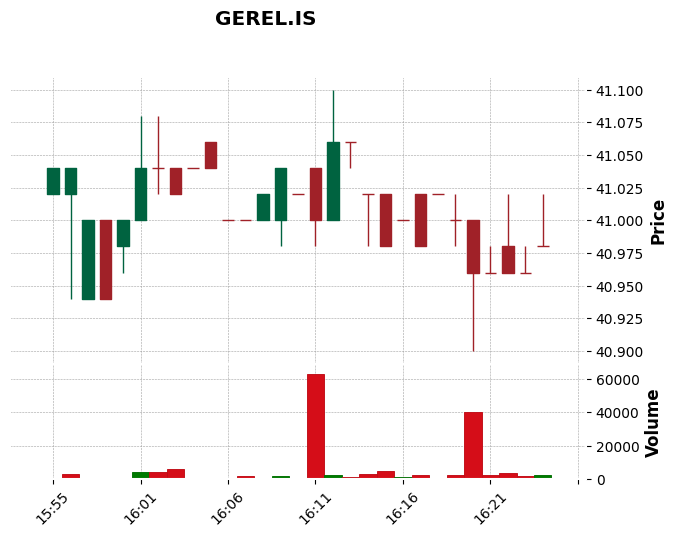

[*********************100%%**********************]  1 of 1 completed


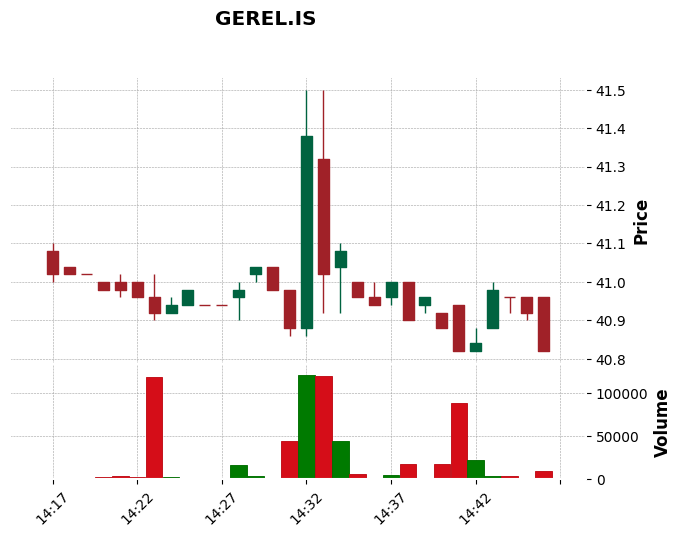

[*********************100%%**********************]  1 of 1 completed


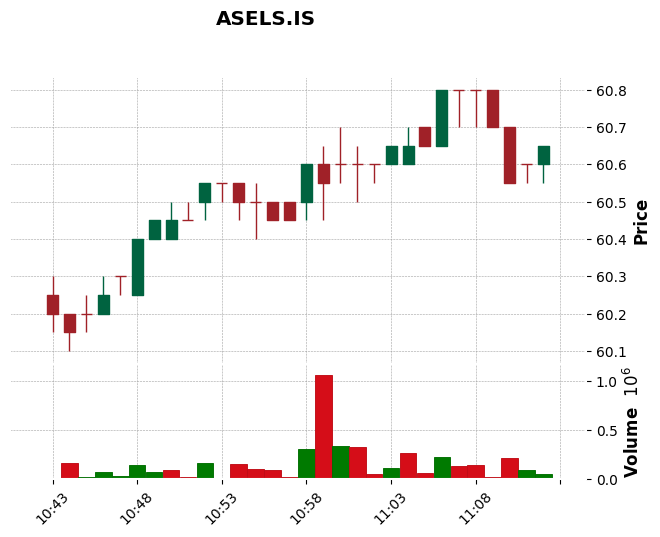

[*********************100%%**********************]  1 of 1 completed


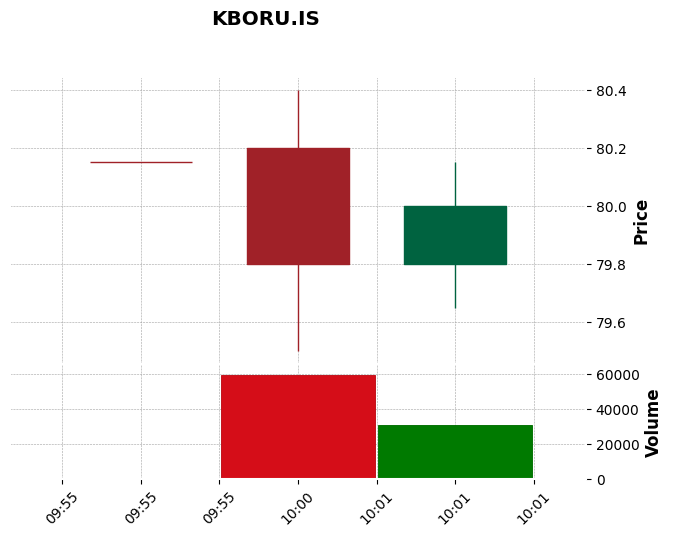

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CWENE.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-14 08:29:00 -> 2024-06-14 08:59:00)')
[*********************100%%**********************]  1 of 1 completed

Boş Dataframe: CWENE




1 Failed download:
['PLTUR.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-13 18:05:00 -> 2024-06-13 18:35:00)')
[*********************100%%**********************]  1 of 1 completed


Boş Dataframe: PLTUR


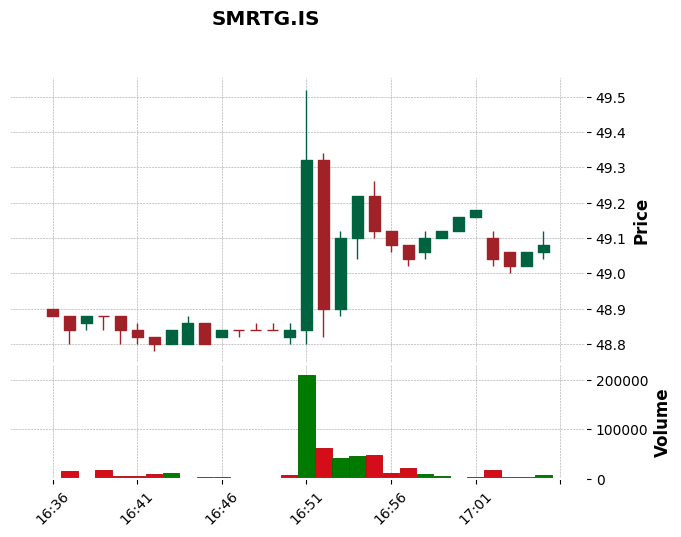

[*********************100%%**********************]  1 of 1 completed
c:\Users\ugurxaslan\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


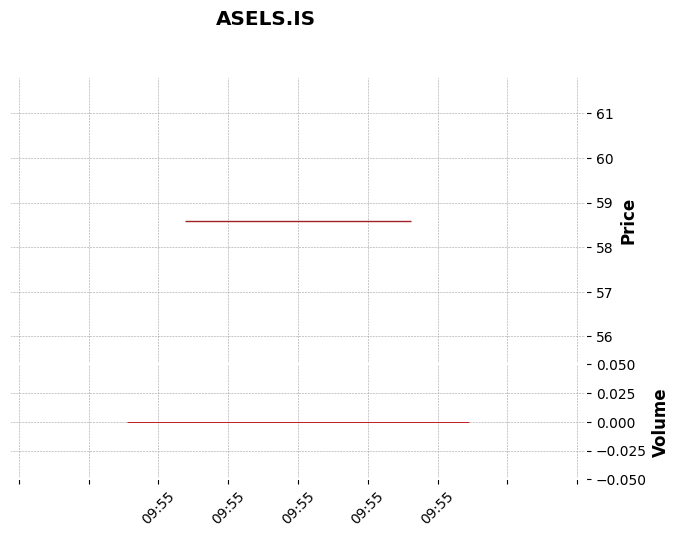

[*********************100%%**********************]  1 of 1 completed


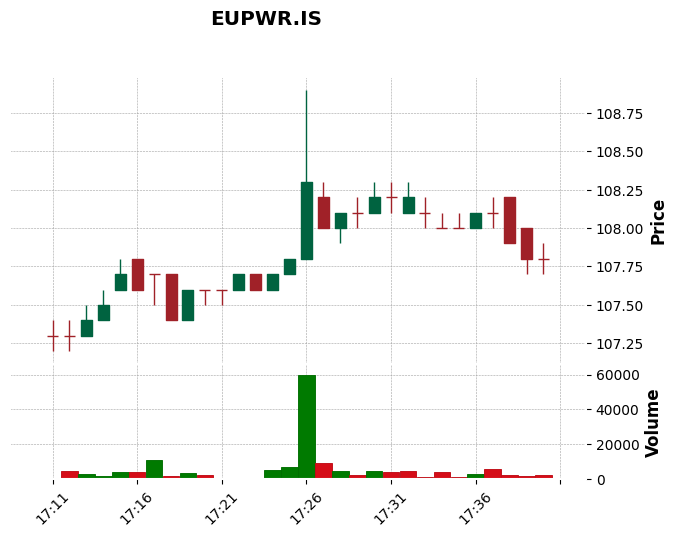

[*********************100%%**********************]  1 of 1 completed


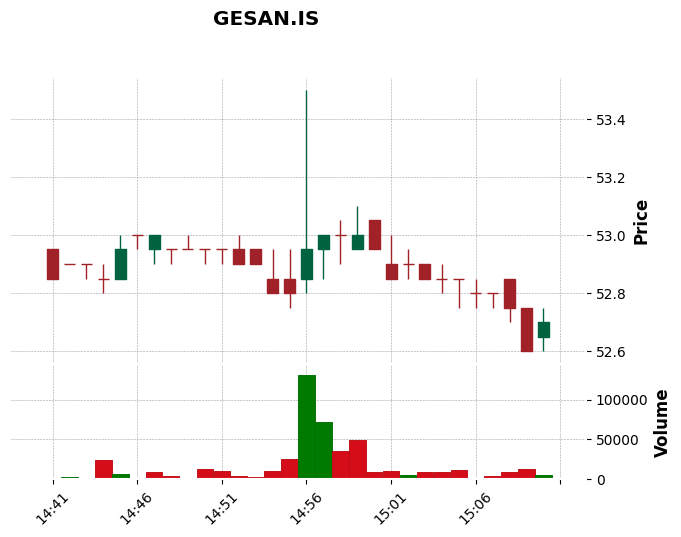

[*********************100%%**********************]  1 of 1 completed


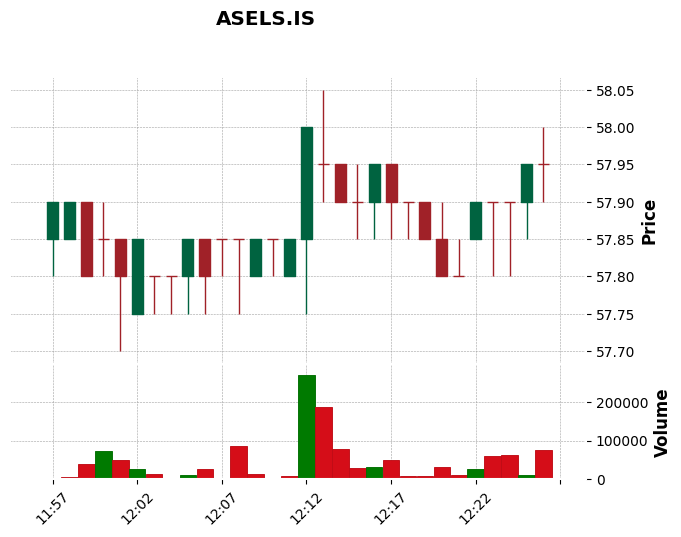

[*********************100%%**********************]  1 of 1 completed


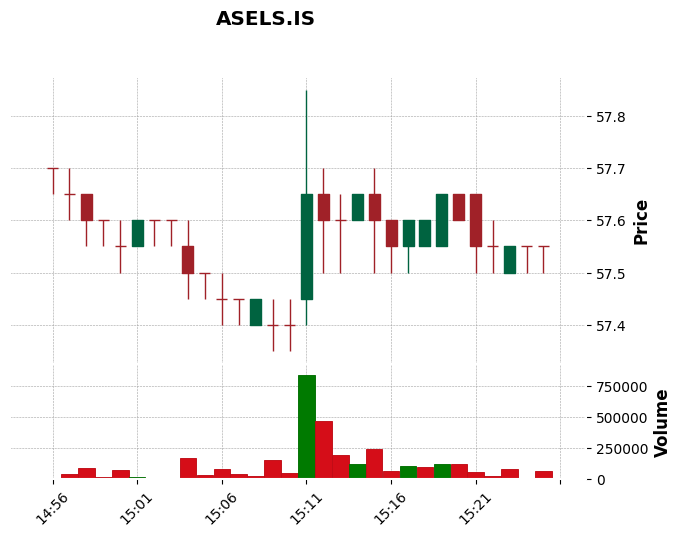

[*********************100%%**********************]  1 of 1 completed


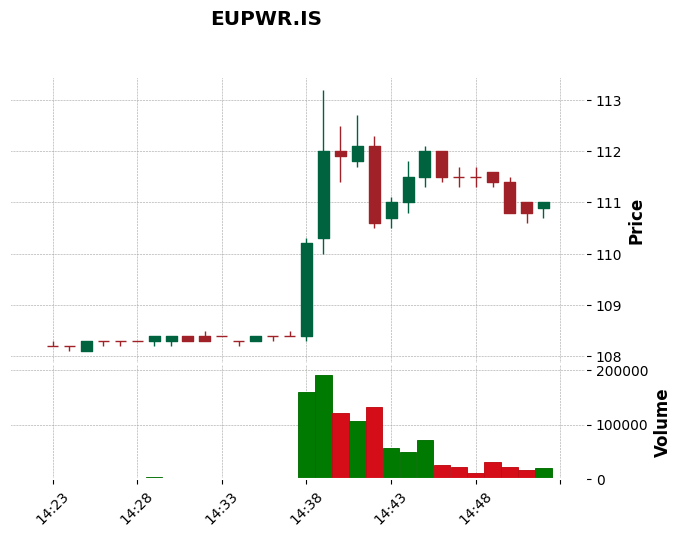

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PLTUR.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-10 18:24:00 -> 2024-06-10 18:54:00)')


Boş Dataframe: PLTUR


[*********************100%%**********************]  1 of 1 completed


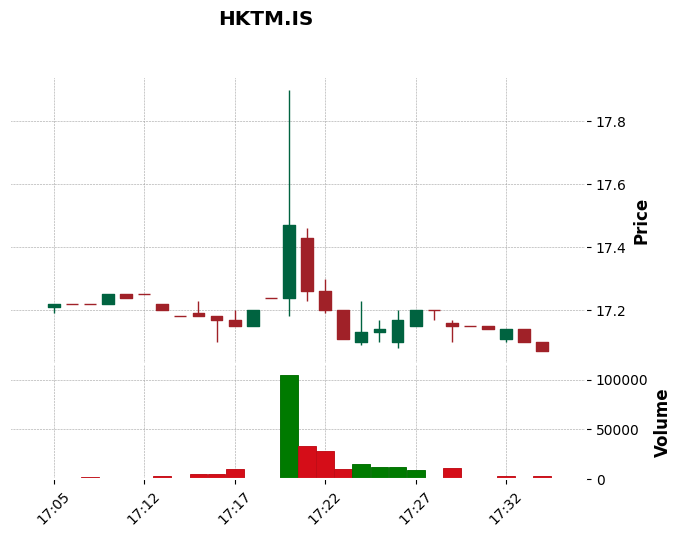

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ODINE.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-10 08:43:00 -> 2024-06-10 09:13:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ONRYT.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-07 19:21:00 -> 2024-06-07 19:51:00)')


Boş Dataframe: ODINE
Boş Dataframe: ONRYT


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PLTUR.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-07 18:24:00 -> 2024-06-07 18:54:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PRKME.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-07 18:23:00 -> 2024-06-07 18:53:00)')


Boş Dataframe: PLTUR
Boş Dataframe: PRKME


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PLTUR.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-07 18:22:00 -> 2024-06-07 18:52:00)')


Boş Dataframe: PLTUR


[*********************100%%**********************]  1 of 1 completed


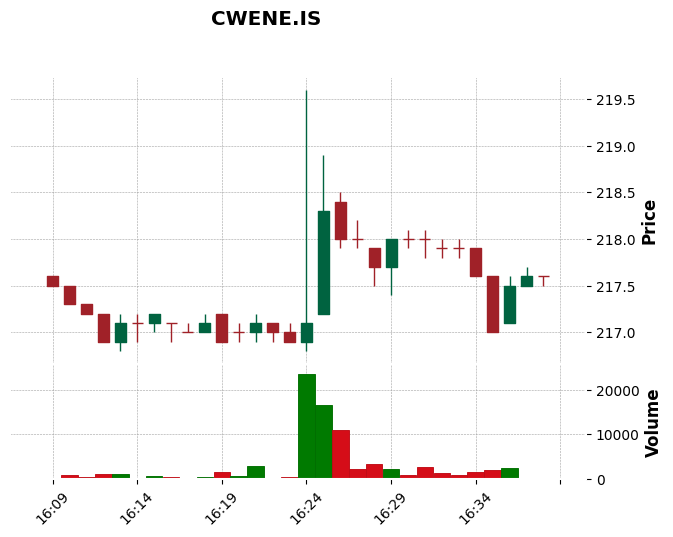

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TUCLK.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-07 09:05:00 -> 2024-06-07 09:35:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ORGE.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-06 18:14:00 -> 2024-06-06 18:44:00)')


Boş Dataframe: TUCLK
Boş Dataframe: ORGE


[*********************100%%**********************]  1 of 1 completed


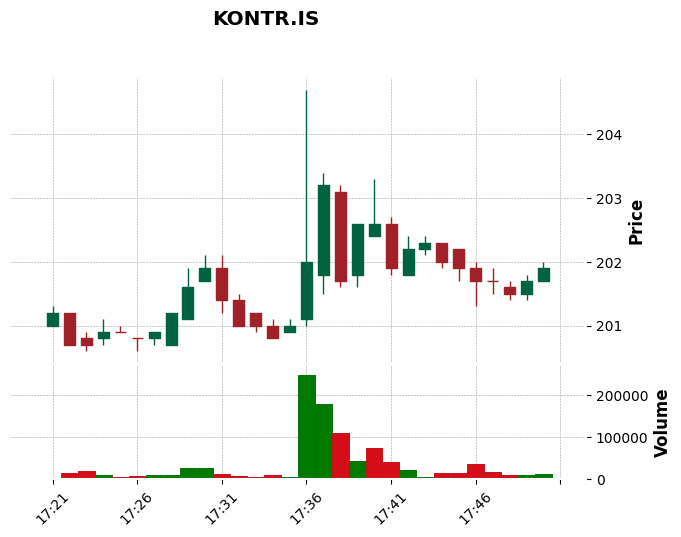

[*********************100%%**********************]  1 of 1 completed


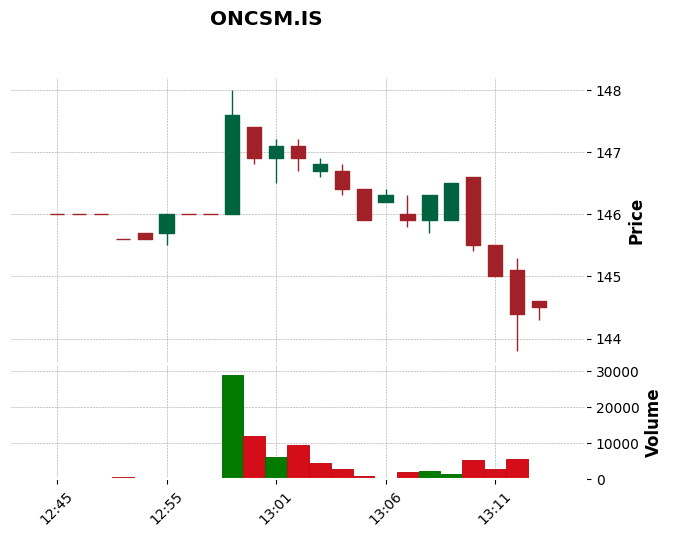

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KBORU.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-05 09:20:00 -> 2024-06-05 09:50:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MEKAG.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-05 09:14:00 -> 2024-06-05 09:44:00)')


Boş Dataframe: KBORU
Boş Dataframe: MEKAG


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PCILT.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-04 19:37:00 -> 2024-06-04 20:07:00)')
[*********************100%%**********************]  1 of 1 completed

Boş Dataframe: PCILT




1 Failed download:
['CWENE.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-04 18:02:00 -> 2024-06-04 18:32:00)')
[*********************100%%**********************]  1 of 1 completed

Boş Dataframe: CWENE




1 Failed download:
['KCAER.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-03 18:20:00 -> 2024-06-03 18:50:00)')


Boş Dataframe: KCAER


[*********************100%%**********************]  1 of 1 completed


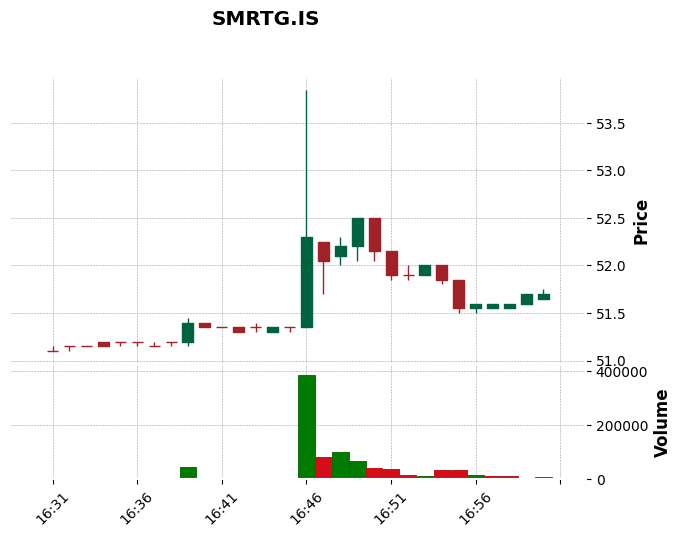

[*********************100%%**********************]  1 of 1 completed


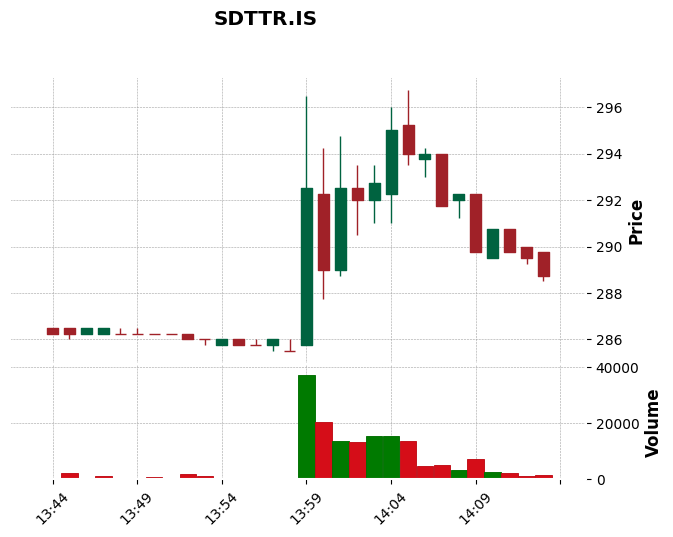

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KONTR.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-06-01 18:57:00 -> 2024-06-01 19:27:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CUSAN.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-31 19:29:00 -> 2024-05-31 19:59:00)')


Boş Dataframe: KONTR
Boş Dataframe: CUSAN


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PRKME.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-31 18:02:00 -> 2024-05-31 18:32:00)')
[*********************100%%**********************]  1 of 1 completed


Boş Dataframe: PRKME


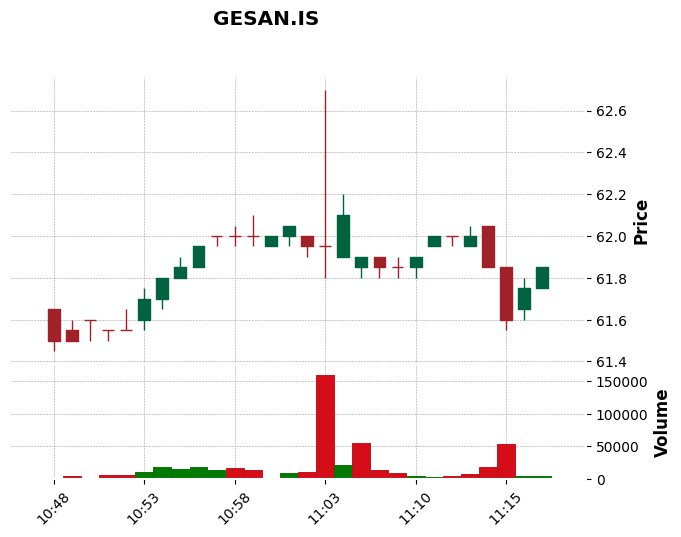

[*********************100%%**********************]  1 of 1 completed
c:\Users\ugurxaslan\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


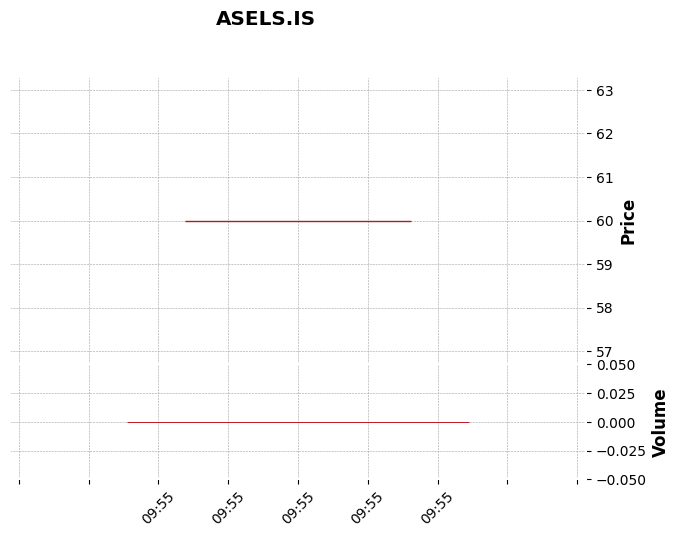

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HRKET.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-29 08:46:00 -> 2024-05-29 09:16:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CVKMD.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-28 18:54:00 -> 2024-05-28 19:24:00)')


Boş Dataframe: HRKET
Boş Dataframe: CVKMD


[*********************100%%**********************]  1 of 1 completed


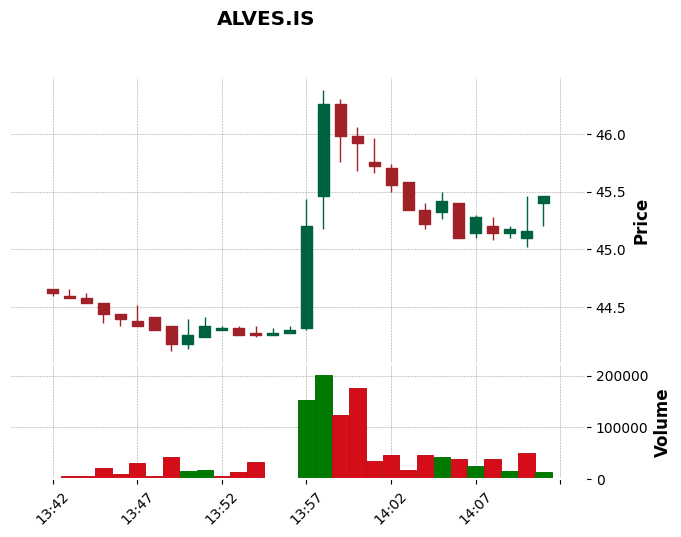

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ALTNY.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-28 08:48:00 -> 2024-05-28 09:18:00)')
[*********************100%%**********************]  1 of 1 completed


Boş Dataframe: ALTNY


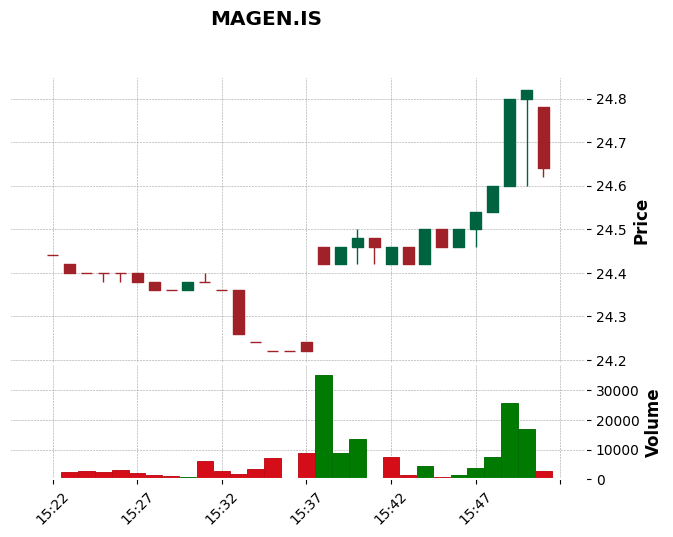

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KMPUR.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-27 08:27:00 -> 2024-05-27 08:57:00)')
[*********************100%%**********************]  1 of 1 completed


Boş Dataframe: KMPUR


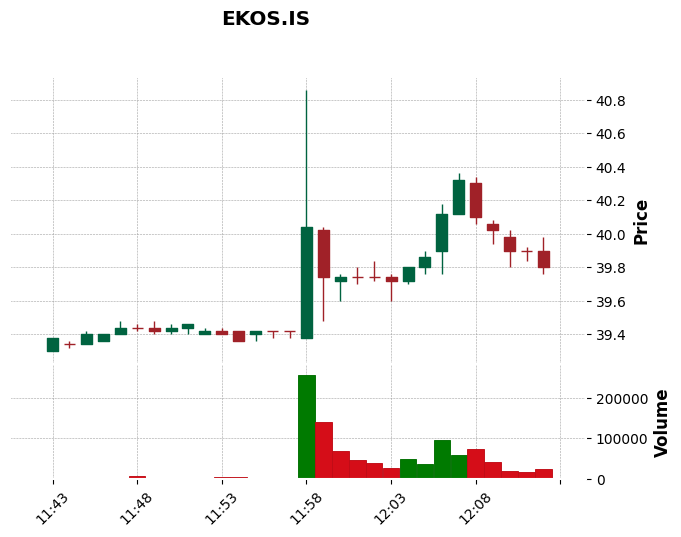

[*********************100%%**********************]  1 of 1 completed
c:\Users\ugurxaslan\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


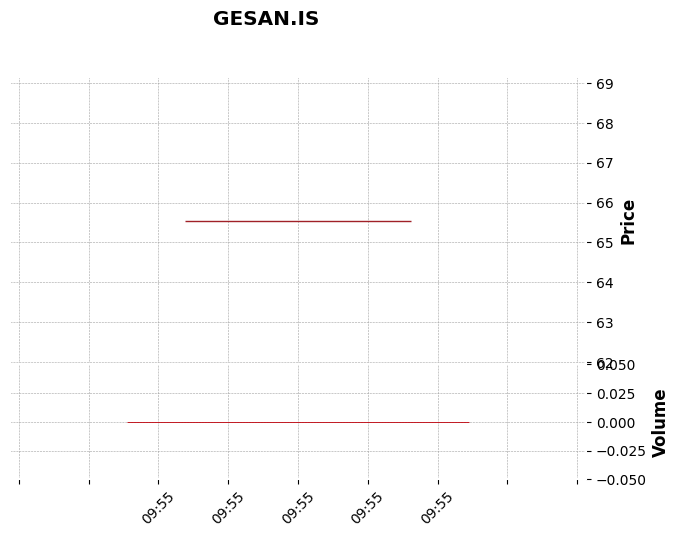

[*********************100%%**********************]  1 of 1 completed


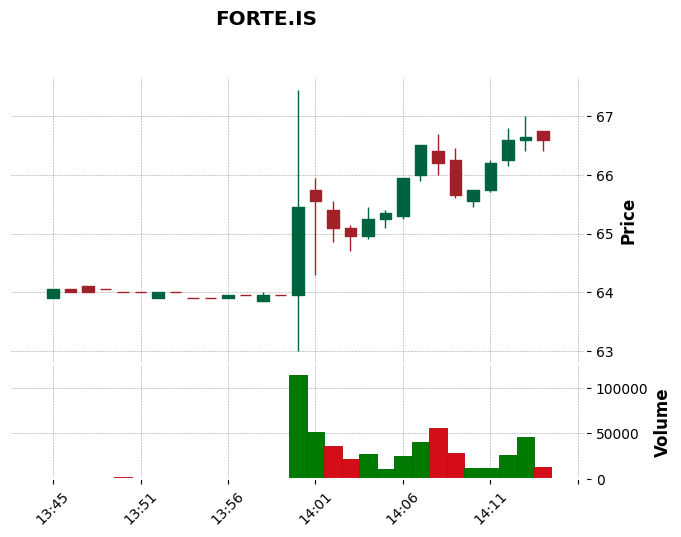

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PENGD.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-22 18:46:00 -> 2024-05-22 19:16:00)')
[*********************100%%**********************]  1 of 1 completed


Boş Dataframe: PENGD


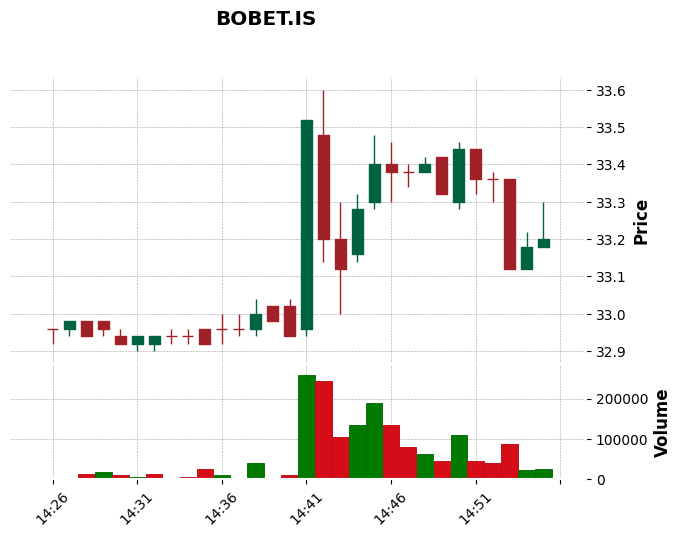

[*********************100%%**********************]  1 of 1 completed


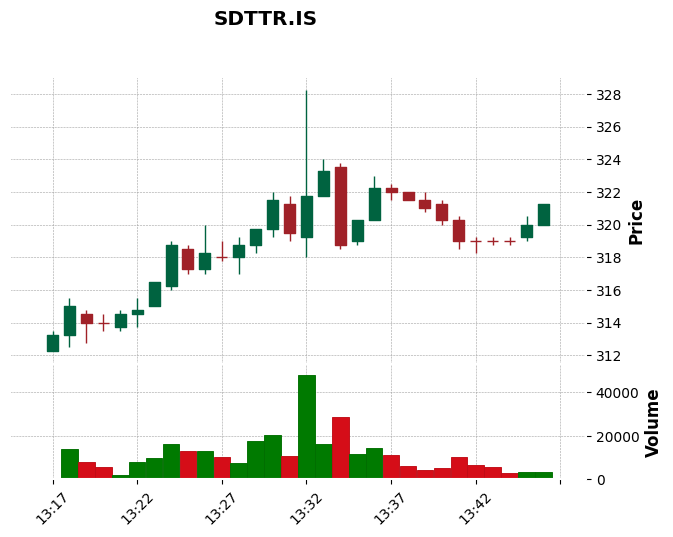

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GEREL.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-21 19:58:00 -> 2024-05-21 20:28:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GEREL.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-21 19:58:00 -> 2024-05-21 20:28:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GEREL.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-21 19:58:00 -> 2024-05-21 20:28:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GEREL.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-21 19:58:00 -> 2024-05-21 20:28:00)')
[*********************100%%**********************]  1 of 1 completed

Boş Dataframe: GEREL
Boş Dataframe: GEREL
Boş Dataframe: GEREL
Boş Dataframe: GEREL




1 Failed download:
['KLSYN.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-21 18:21:00 -> 2024-05-21 18:51:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GESAN.IS']: Exception('%ticker%: No price data found, symbol may be delisted (1m 2024-05-21 18:15:00 -> 2024-05-21 18:45:00)')


Boş Dataframe: KLSYN
Boş Dataframe: GESAN


[*********************100%%**********************]  1 of 1 completed


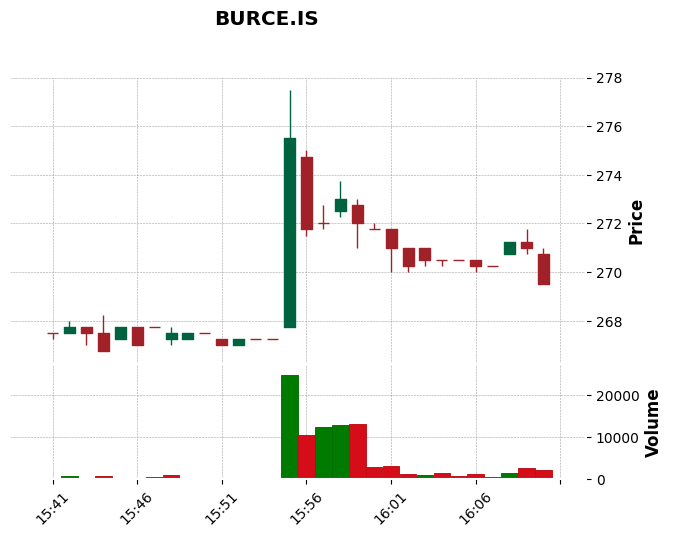

[*********************100%%**********************]  1 of 1 completed


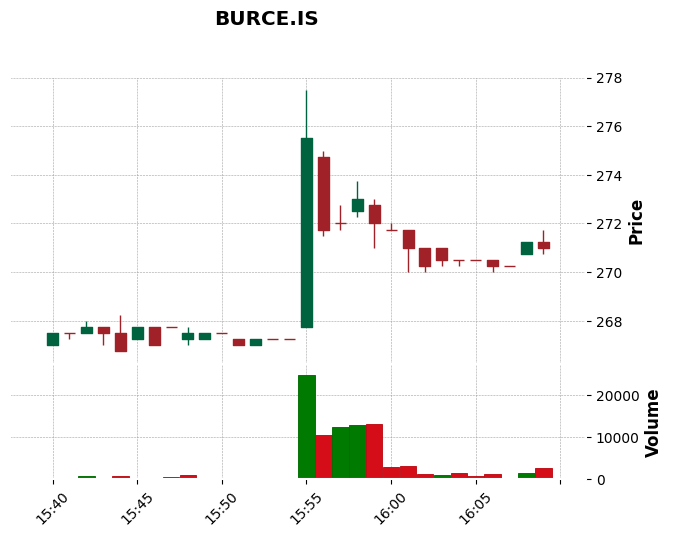

In [6]:

import yfinance as yf
import mplfinance as mpf
from datetime import timedelta

for i in range(len(df1)):
    kod=df1['Kod'].iloc[i] + ".IS"
    haber_saati_once = df1['tarih'].iloc[i]  - timedelta(minutes=15)
    haber_saati_sonra = df1['tarih'].iloc[i]  + timedelta(minutes=15)
    try:
        sonuc = yf.download(kod, start=haber_saati_once, end=haber_saati_sonra, interval='1m')
        if not sonuc.empty :
            mpf.plot(sonuc, type='candle', style='charles', volume=True,title=kod)
        else:
            print("Boş Dataframe:",df1['Kod'].iloc[i])       
    except  Exception as e:
        print(e)
